In [209]:
import geopandas as gpd
gpd = gpd.read_file("export1.geojson")

In [210]:
gpd.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 81 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   id                        961 non-null    object  
 1   @id                       961 non-null    object  
 2   addr:city                 25 non-null     object  
 3   addr:full                 2 non-null      object  
 4   addr:housenumber          1 non-null      object  
 5   addr:place                2 non-null      object  
 6   addr:postcode             27 non-null     object  
 7   addr:street               2 non-null      object  
 8   addr:suburb               2 non-null      object  
 9   amenity                   31 non-null     object  
 10  area                      6 non-null      object  
 11  bridge                    3 non-null      object  
 12  building                  1 non-null      object  
 13  cables                    2 non-null      

In [211]:
print(gdf)

                   id               @id addr:city addr:full addr:housenumber  \
0    relation/1827899  relation/1827899       NaN       NaN              NaN   
1    relation/4508663  relation/4508663       NaN       NaN              NaN   
2    relation/5174245  relation/5174245       NaN       NaN              NaN   
3    relation/6103946  relation/6103946       NaN       NaN              NaN   
4    relation/6564822  relation/6564822       NaN       NaN              NaN   
..                ...               ...       ...       ...              ...   
956  node/10102806917  node/10102806917       NaN       NaN               10   
957  node/10794187996  node/10794187996       NaN       NaN              NaN   
958  node/10794187997  node/10794187997       NaN       NaN              NaN   
959  node/10794188080  node/10794188080       NaN       NaN              NaN   
960  node/10794188081  node/10794188081       NaN       NaN              NaN   

    addr:place addr:postcode           

In [212]:
gdf['name'].value_counts()

Youssoufia                                             3
Route Nationale 11                                     1
Pharmacie Al Qods صيدلية القدس                         1
Pharmacie Lahdir صيدلية لهضير                          1
Pharmacie Zainab صيدلية زينب                           1
Pharmacie Chefchaouni صيدلية الشفشاوني                 1
Pharmacie Najmi صيدلية نجمي                            1
Pharmacie Zaytouna صيدلية زيتونة                       1
Pharmacie Moatamid Ibn Abbad صيدلية المعتمد بن عباد    1
Pharmacie Dokkali صيدلية دكالي                         1
Pharmacie Orphelinat صيدلية الخيرية                    1
Pharmacie Kachkat صيدلية كاشكاط                        1
Pharmacie Zaid صيدلية زيد                              1
Pharmacie Louis Gentil صيدلية لويس جونتي               1
Pharmacie Minicipalité صيدلية البلدية                  1
Pharmacie Ahmar صيدلية أحمر                            1
Pharmacie Inas صيدلية ايناس                            1
Safi - Ben Guerir أسفي - ابن جر

In [213]:
gdf['amenity'].value_counts()

pharmacy            23
post_office          2
fuel                 2
parking              1
bus_station          1
place_of_worship     1
taxi                 1
Name: amenity, dtype: int64

In [214]:
gdf['geometry'].value_counts()

LINESTRING (-8.52653 32.26371, -8.52631 32.263...    2
MULTILINESTRING ((-8.52653 32.26371, -8.52631 ...    1
POLYGON ((-8.52369 32.25296, -8.52429 32.25286...    1
POLYGON ((-8.53592 32.23839, -8.53553 32.23715...    1
MULTILINESTRING ((-8.52210 32.25125, -8.52203 ...    1
                                                    ..
POINT (-8.53795 32.23999)                            1
POINT (-8.53560 32.23602)                            1
POINT (-8.52399 32.25216)                            1
POINT (-8.52330 32.25198)                            1
POINT (-8.52044 32.25193)                            1
Name: geometry, Length: 960, dtype: int64

C:\Users\Youcode\AppData\Local\Temp\ipykernel_6612\185296669.py:24: UserWarning:

Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler



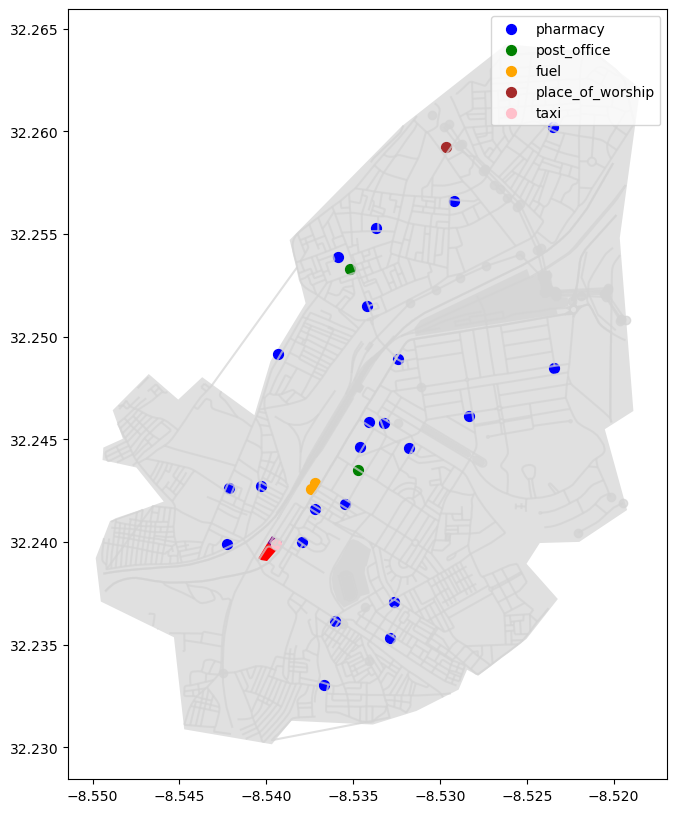

In [215]:
import matplotlib.pyplot as plt

poi_categories = ['pharmacy', 'post_office', 'fuel', 'parking', 'bus_station', 'place_of_worship', 'taxi']
selected_poi_gdf = gdf[gdf['amenity'].isin(poi_categories)]

category_colors = {
    'pharmacy': 'blue',
    'post_office': 'green',
    'fuel': 'orange',
    'parking': 'purple',
    'bus_station': 'red',
    'place_of_worship': 'brown',
    'taxi': 'pink'
}

fig, ax = plt.subplots(figsize=(10, 10))

gdf.plot(ax=ax, color='lightgray', alpha=0.7)

for category, color in category_colors.items():
    category_gdf = selected_poi_gdf[selected_poi_gdf['amenity'] == category]
    category_gdf.plot(ax=ax, color=color, markersize=50, label=category)

ax.legend()

plt.show()


In [216]:
from geopy.distance import geodesic

# Assuming you have two points of interest with their latitude and longitude
poi1_latitude = 12.3456
poi1_longitude = 78.9101

poi2_latitude = 34.5678
poi2_longitude = 90.1234

# Calculate the distance using geodesic
distance = geodesic((poi1_latitude, poi1_longitude), (poi2_latitude, poi2_longitude)).kilometers

print(f"The distance between the two points is approximately {distance:.2f} kilometers.")


The distance between the two points is approximately 2710.03 kilometers.


In [218]:
def calculate_distance_by_name(source_name, destination_name):
    geolocator = Nominatim(user_agent="poi_distance_calculator")
    
    try:
        source_location = geolocator.geocode(source_name)
        destination_location = geolocator.geocode(destination_name)
    except Exception as e:
        print("Error:", e)
        return None
    
    source_latitude, source_longitude = source_location.latitude, source_location.longitude
    destination_latitude, destination_longitude = destination_location.latitude, destination_location.longitude
    
    distance = geodesic((source_latitude, source_longitude), (destination_latitude, destination_longitude)).kilometers
    
    return distance


source_name = input("Enter the name of the source point of interest: ")
destination_name = input("Enter the name of the destination point of interest: ")

if (gdf['name'] == source_name).any() and (gdf['name'] == destination_name).any():
    source_geometry = gdf[gdf['name'] == source_name]['geometry'].values[0]
    destination_geometry = gdf[gdf['name'] == destination_name]['geometry'].values[0]

    distance = geodesic((source_geometry.y, source_geometry.x), (destination_geometry.y, destination_geometry.x)).kilometers

    print(f"The distance between {source_name} and {destination_name} is approximately {distance:.2f} kilometers.")
else:
    print("Error: One or both of the given names do not exist in the GeoDataFrame.")


Enter the name of the source point of interest: Pharmacie Inas صيدلية ايناس
Enter the name of the destination point of interest: Pharmacie Louis Gentil صيدلية لويس جونتي
The distance between Pharmacie Inas صيدلية ايناس and Pharmacie Louis Gentil صيدلية لويس جونتي is approximately 1.19 kilometers.


Enter the name of the source point of interest: Pharmacie Inas صيدلية ايناس
Enter the name of the destination point of interest: Pharmacie Louis Gentil صيدلية لويس جونتي


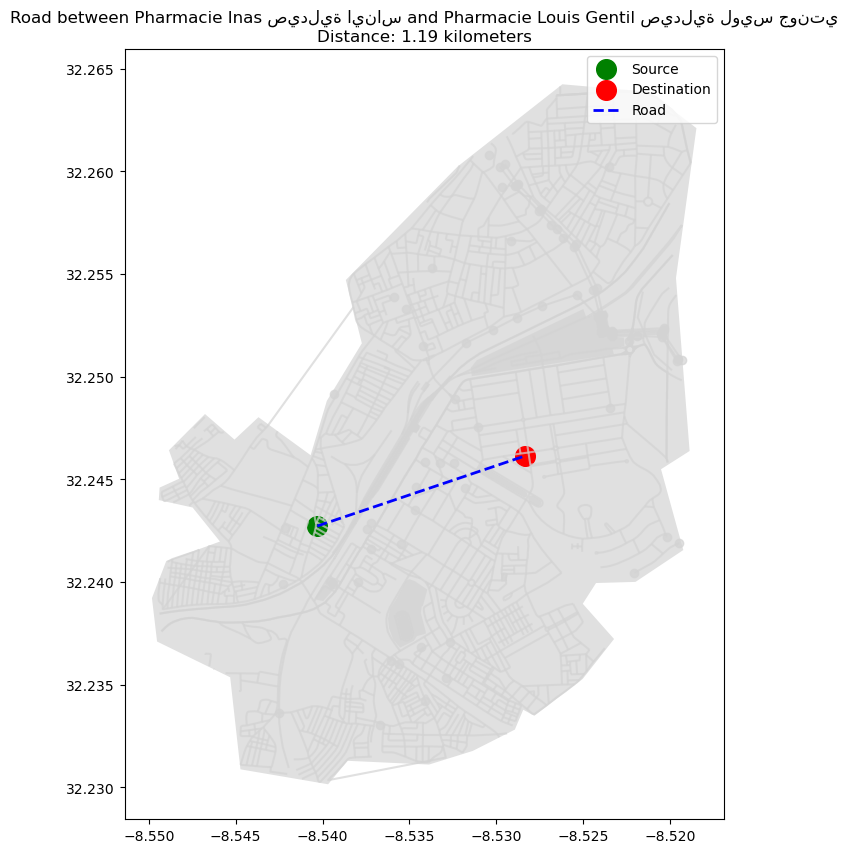

In [220]:
from geopy.geocoders import Nominatim
from shapely.geometry import Point, LineString

source_name = input("Enter the name of the source point of interest: ")
destination_name = input("Enter the name of the destination point of interest: ")

if (gdf['name'] == source_name).any() and (gdf['name'] == destination_name).any():
    source_geometry = gdf[gdf['name'] == source_name]['geometry'].values[0]
    destination_geometry = gdf[gdf['name'] == destination_name]['geometry'].values[0]

    distance = calculate_distance_by_name(source_name, destination_name)

    fig, ax = plt.subplots(figsize=(10, 10))

    gdf.plot(ax=ax, color='lightgray', alpha=0.7)

    ax.scatter(source_geometry.x, source_geometry.y, color='green', marker='o', s=200, label='Source')
    ax.scatter(destination_geometry.x, destination_geometry.y, color='red', marker='o', s=200, label='Destination')

    road_line = LineString([(source_geometry.x, source_geometry.y), (destination_geometry.x, destination_geometry.y)])
    road_gdf = gpd.GeoDataFrame(geometry=[road_line], crs=gdf.crs)
    road_gdf.plot(ax=ax, color='blue', linewidth=2, linestyle='--', label='Road')

    ax.legend()
    plt.title(f"Road between {source_name} and {destination_name}\nDistance: {distance:.2f} kilometers")
    plt.show()
else:
    print("Error: One or both of the given names do not exist in the GeoDataFrame.")


In [195]:
import folium
from folium.plugins import MarkerCluster

gdf_points = gdf[gdf.geometry.type == 'Point']

gdf_json = gdf.to_crs(epsg='4326').to_json()

map_center = [gdf_points.geometry.y.mean(), gdf_points.geometry.x.mean()]
m = folium.Map(location=map_center, zoom_start=12)

folium.GeoJson(
    gdf_json,
    name='GeoJSON',
    style_function=lambda feature: {
        'color': 'lightgray',
        'weight': 2,
        'fillOpacity': 0.7,
    },
).add_to(m)

marker_cluster = MarkerCluster().add_to(m)

for category, color in category_colors.items():
    category_gdf = selected_poi_gdf[selected_poi_gdf['amenity'] == category]
    for index, row in category_gdf.iterrows():
        geometry = row['geometry']
        if geometry.type == 'Point':
            location = [geometry.y, geometry.x]
        else: 
            location = [geometry.centroid.y, geometry.centroid.x]
        folium.Marker(
            location=location,
            icon=folium.Icon(color=color, icon='circle', prefix='fa'),
            popup=category,
        ).add_to(marker_cluster)

folium.LayerControl().add_to(m)

m.save('interactive_map.html')


C:\Users\Youcode\AppData\Local\Temp\ipykernel_6612\2649215887.py:36: ShapelyDeprecationWarning:

The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.

C:\Users\Youcode\AppData\Local\Temp\ipykernel_6612\2649215887.py:42: UserWarning:

color argument of Icon should be one of: {'darkred', 'cadetblue', 'black', 'white', 'green', 'pink', 'red', 'lightgray', 'darkpurple', 'orange', 'darkblue', 'blue', 'gray', 'purple', 'lightblue', 'lightred', 'lightgreen', 'beige', 'darkgreen'}.



In [207]:
import folium
from folium.plugins import MarkerCluster
from geopy.distance import geodesic
import geopandas as gpd

# Assuming you have 'gdf' and 'category_colors' defined as in your code

# Filter 'gdf' to include only Point geometries
gdf_points = gdf[gdf.geometry.type == 'Point']

# Convert GeoDataFrame to GeoJSON format
gdf_json = gdf.to_crs(epsg='4326').to_json()

# Calculate the mean coordinates for the map center
map_center = [gdf_points.geometry.y.mean(), gdf_points.geometry.x.mean()]
m = folium.Map(location=map_center, zoom_start=12)

# Plot the GeoJSON data on the map as a GeoJson layer
folium.GeoJson(
    gdf_json,
    name='GeoJSON',
    style_function=lambda feature: {
        'color': 'lightgray',
        'weight': 2,
        'fillOpacity': 0.7,
    },
).add_to(m)

# Create a marker cluster for the points of interest
marker_cluster = MarkerCluster().add_to(m)

# List to store the selected points
selected_points = []

# Add a custom JavaScript callback function for map clicks
callback = """
var selected_points = [];

function onMapClick(e) {
    if (selected_points.length === 2) {
        for (var i = 0; i < selected_points.length; i++) {
            selected_points[i].removeFrom(m);
        }
        selected_points = [];
    }

    var lat = e.latlng.lat;
    var lon = e.latlng.lng;

    var marker = L.marker([lat, lon], {icon: redIcon}).addTo(marker_cluster);
    selected_points.push(marker);

    if (selected_points.length === 2) {
        var coords1 = selected_points[0].getLatLng();
        var coords2 = selected_points[1].getLatLng();
        var distance = L.GeometryUtil.distance(coords1, coords2);

        L.polyline([coords1, coords2], {color: 'blue', weight: 2, opacity: 0.7}).addTo(m);
        L.marker(coords1, {icon: divIcon(distance)}).addTo(m);
        L.marker(coords2, {icon: divIcon(distance)}).addTo(m);
    }
}

m.on('click', onMapClick);
"""

# Add the JavaScript callback to the map using add_child
m.add_child(folium.Element(callback))

# Define custom icons
redIcon = folium.Icon(color='red', icon='circle', prefix='fa')
divIcon = folium.DivIcon(html='<div></div>')

# Add a layer control to toggle the visibility of POI categories
folium.LayerControl().add_to(m)

# Display the interactive map
m.save('interactive_map_with_distance.html')


In [223]:
from geopy.geocoders import Nominatim
from shapely.geometry import Point, LineString
import folium

source_name = input("Enter the name of the source point of interest: ")
destination_name = input("Enter the name of the destination point of interest: ")

if (gdf['name'] == source_name).any() and (gdf['name'] == destination_name).any():
    source_geometry = gdf[gdf['name'] == source_name]['geometry'].values[0]
    destination_geometry = gdf[gdf['name'] == destination_name]['geometry'].values[0]

    distance = calculate_distance_by_name(source_name, destination_name)

    # Create a folium map centered on the average of source and destination coordinates
    center_lat = (source_geometry.y + destination_geometry.y) / 2
    center_lon = (source_geometry.x + destination_geometry.x) / 2
    my_map = folium.Map(location=[center_lat, center_lon], zoom_start=10)

    # Add the GeoDataFrame as a layer to the folium map
    folium.GeoJson(gdf.to_json()).add_to(my_map)

    # Add source and destination markers to the map
    folium.Marker([source_geometry.y, source_geometry.x], popup=source_name, icon=folium.Icon(color='green')).add_to(my_map)
    folium.Marker([destination_geometry.y, destination_geometry.x], popup=destination_name, icon=folium.Icon(color='red')).add_to(my_map)

    # Create a LineString between source and destination and add it as a feature to the map
    road_line = LineString([(source_geometry.x, source_geometry.y), (destination_geometry.x, destination_geometry.y)])
    road_gdf = gpd.GeoDataFrame(geometry=[road_line], crs=gdf.crs)
    folium.GeoJson(road_gdf.to_json(), style_function=lambda x: {'color': 'blue', 'weight': 2, 'opacity': 0.7}).add_to(my_map)

    # Display distance as a label on the map
    folium.Marker([(source_geometry.y + destination_geometry.y) / 2, (source_geometry.x + destination_geometry.x) / 2],
                  popup=f"Distance: {distance:.2f} kilometers", icon=folium.DivIcon(html=f"<div>{distance:.2f} km</div>")).add_to(my_map)

    # Display the interactive map
    display(my_map)
else:
    print("Error: One or both of the given names do not exist in the GeoDataFrame.")


Enter the name of the source point of interest: Pharmacie Inas صيدلية ايناس
Enter the name of the destination point of interest: Pharmacie Louis Gentil صيدلية لويس جونتي
